# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction

Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)

Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives

Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [1]:
# Pandas is a software library written for the python programming 
# language for data manipulation and analysis
import pandas as pd

# Numpy is a library for the Python programming language
# adding support for large, multi-dimensional arrays and matrices
# along with a large collection of high-level mathematical fxns to operate on these arrays
import numpy as np


# Matplotlib is a plotting library for python and pyplot gives a Matlab
# like plotting framework. it will be used in the plotter function to plot data
import matplotlib.pyplot as plt

# Seaborn is a Python data visualization library based on matplotlib. It provides high-level interface
# for drawing attractive and informative statistical graphs
import seaborn as sns

# Preprocessing allows standardization of data
from sklearn import preprocessing

# Train_test_split splits the data intro training and testing datasets
from sklearn.model_selection import train_test_split

# GridSearchCV tests parameters of classification algorithm and find the best one
from sklearn.model_selection import GridSearchCV

# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression

# Support Vector Machine classification algorithm
from sklearn.svm import SVC

# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier

# K Nearest Neighbor classification algorithm
from sklearn.neighbors import KNeighborsClassifier

C:\Users\ASENPRINCE\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def plot_confusion_matrix(y, y_predict):
    """
    This function pots the confusion matrix
    Parameters: y, y_predict
    Output: confusion matrix figure
    """
    
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax) #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'landed'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Load the dataframe

In [3]:
data = pd.read_csv('dataset_part_2.csv')
data.shape

(90, 18)

In [4]:
X = pd.read_csv('dataset_part_3.csv')
X.head(100)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Leg,Block,ReusedCount,ES-L1,GEO,...,B1048,B1049,B1050,B1051,B1054,B1056,B1058,B1059,B1060,B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15600.000000,2.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15600.000000,3.0,1.0,1.0,1.0,5.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15600.000000,6.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15600.000000,3.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## TASK  1

Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).

In [5]:
Y = data['Class'].to_numpy()
type(Y)

numpy.ndarray

In [6]:
Y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

## TASK  2

Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [7]:
X = preprocessing.StandardScaler().fit_transform(X)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## Task 3

Use the funtion train_test_split to split the data X and Y into training and test data. Set the parameter test_size to 0.2 and random_state to 2. The training data and test data should be assigned to the following labels: <p> `X_train`, `X_test`,`Y_train`,`Y_test` </p>

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=2)

In [9]:
X_train.shape[0], Y_train.shape[0]

(72, 72)

In [10]:
# 18 (20% of 90) test samples
Y_test.shape

(18,)

In [53]:
model_accuracy = {}

## Task 4

Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [11]:
parameters = {'C': [0.01, 0.1, 1],
             'penalty': ['l2'], # l1=lasso; l2=ridge
             'solver': ['lbfgs']}

In [12]:
lr = LogisticRegression()

`GridSearchCV` object for logistic regression would display the best parameters using the data attribute `best_params_` and the accuracy score on the validatio data using the data attribute `best_score_`

In [13]:
# assign the GridSearchCV for the lr and the parameters
logreg_cv = GridSearchCV(lr, parameters)

# fit the train dataset to the CV
logreg_cv.fit(X_train, Y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [14]:
print("tuned hyperparameters: (best parameters) ", logreg_cv.best_params_)
print("accuracy: ", logreg_cv.best_score_)

tuned hyperparameters: (best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy:  0.8342857142857142


## Task 5

Calculate the accuracy on the test data using the method `score`

In [54]:
print('Model Accuracy: ', logreg_cv.score(X_test, Y_test))
model_accuracy['Model'] = 'LR'
model_accuracy['Score'] = logreg_cv.score(X_test, Y_test)
model_accuracy

Model Accuracy:  0.8333333333333334


{'Model': 'LR', 'Score': 0.8333333333333334}

Confusion Matrix

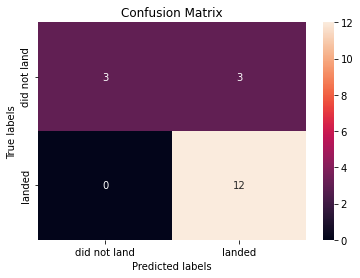

In [41]:
lr_yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## Task 6

Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [17]:
parameters = {'kernel':('sigmoid', 'linear', 'rbf','poly','rbf'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [18]:
svm_cv = GridSearchCV(svm, parameters)
svm_cv.fit(X_train, Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('sigmoid', 'linear', 'rbf', 'poly', 'rbf')})

In [19]:
print("tuned hyperparameters : (best parameters) ", svm_cv.best_params_)
print("accuracy :", svm_cv.best_score_)

tuned hyperparameters : (best parameters)  {'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.8485714285714285


## TASK 7

Calculate the accuracy on the test data usin gthe method `score`:

In [55]:
print('Model Accuracy: ', svm_cv.score(X_test, Y_test))
model_accuracy['Model'] = 'SVC'
model_accuracy['Score']=svm_cv.score(X_test, Y_test)
model_accuracy

Model Accuracy:  0.8333333333333334


{'Model': 'SVC', 'Score': 0.8333333333333334}

Confusion Matrix

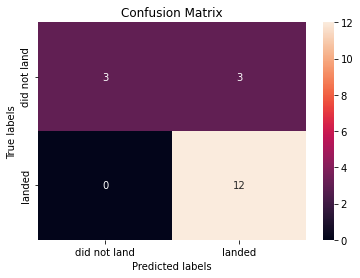

In [40]:
svm_yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [76]:
parameters = {'criterion': ['gini', 'entropy'],
             'splitter': ['best', 'random'],
             'max_depth': [2*n for n in range(1, 10)],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1,2,4],
             'min_samples_split': [2,5,10]}

tree = DecisionTreeClassifier()

In [77]:
tree_cv = GridSearchCV(tree, parameters)
tree_cv.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [78]:
print("tuned hyperparameters : (best parameters) ", tree_cv.best_params_)
print("accuracy : ", tree_cv.best_score_)

tuned hyperparameters : (best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
accuracy :  0.8885714285714286


## TASK 9

Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:

In [79]:
print('Model Accuracy on test data: ', tree_cv.score(X_test, Y_test))


Model Accuracy on test data:  0.8888888888888888


Confusion Matrix

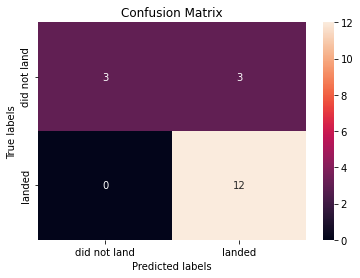

In [80]:
tree_yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

## TASK 10

Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [27]:
parameters = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'p': [1,2]}

KNN = KNeighborsClassifier()

In [28]:
knn_cv = GridSearchCV(KNN, parameters)
knn_cv.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [29]:
print("tuned hyperparameters : (best parameters) ", knn_cv.best_params_)
print("accuracy : ", knn_cv.best_score_)

tuned hyperparameters : (best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy :  0.8190476190476191


## TASK  11

Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:

In [37]:
print('Model Accuracy on test dataset: ', knn_cv.score(X_test, Y_test))
model_accuracy['Model'] = 'KNN'
model_accuracy['score'] = knn_cv.score(X_test, Y_test)
model_accuracy

Model Accuracy on test dataset:  0.8333333333333334


{'Logistic Regression': 0.8333333333333334,
 'SVC': 0.8333333333333334,
 'Decision Tree': 0.8888888888888888,
 'KNN': 0.8333333333333334}

In [59]:
model_accuracy = {'Model':['LR', 'Tree', 'SVM', 'KNN'],
    'Score':[logreg_cv.score(X_test, Y_test), tree_cv.score(X_test, Y_test), svm_cv.score(X_test, Y_test), knn_cv.score(X_test, Y_test)]
}

model_accuracy

{'Model': ['LR', 'Tree', 'SVM', 'KNN'],
 'Score': [0.8333333333333334,
  0.8888888888888888,
  0.8333333333333334,
  0.8333333333333334]}

Confusion Matrix

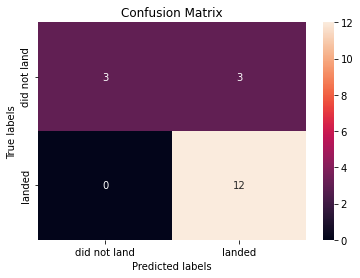

In [38]:
knn_yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

## TASK 12

Find the method that performs best

In [43]:
predicted_values = [lr_yhat, tree_yhat, svm_yhat, knn_yhat]
models = ['LR', 'Tree', 'SVM', 'KNN']

In [49]:
from sklearn.metrics import jaccard_score as js, f1_score
jaccard_scores = []
f1_scores = []
for pv in predicted_values:
    jaccard_scores.append(js(Y_test, pv, pos_label=1))
    f1_scores.append(f1_score(Y_test, pv, average='weighted'))

print(jaccard_scores)
print(f1_scores)

[0.8, 0.8571428571428571, 0.8, 0.8]
[0.8148148148148149, 0.882051282051282, 0.8148148148148149, 0.8148148148148149]


In [60]:
scores_df = pd.DataFrame.from_dict(model_accuracy)
scores_df

,Model,Score
0,LR,0.833333
1,Tree,0.888889
2,SVM,0.833333
3,KNN,0.833333


<module 'matplotlib.pyplot' from 'C:\\Users\\ASENPRINCE\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

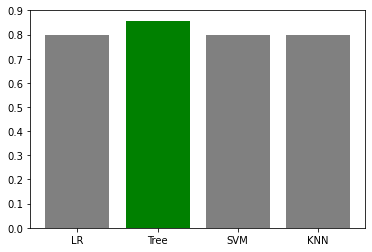

In [72]:
import matplotlib.pyplot as plt
colors = ['grey', 'green', 'grey', 'grey']
plt.bar(models, jaccard_scores, color=colors)

plt